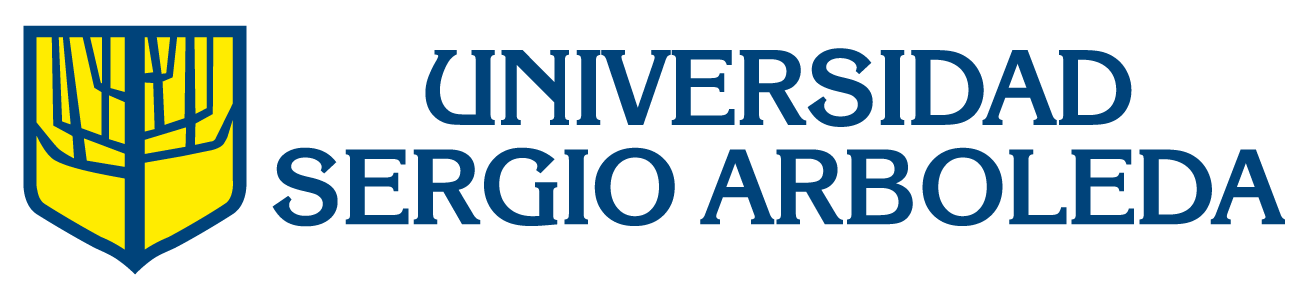


---




#**Filtros y Transformaciones**

**Autores:**  
* Miguel Thomas
* Carlos Bermúdez


**Programa acádemico:**  

* Ciencias de la computación e Inteligencia Artificial

**Materia:**   
* Procesamiento de Imágenes

# Taller -  Requerimientos
Cree un notebook de python que contenga las funciones que implementan las operaciones indicadas a continuación:

  1. una función que recibe como parámetros una imagen (no cromática), una matriz con factores (w), y un indicador de si calcula la correlación o la convolución de la imagen, por defecto correlación, y retorna el resultado de aplicar el filtro espacial indicado en w.
  2. una función que calcula el filtro no lineal con la gaussiana, el filtro debe recibir la imagen, el tamaño del lado de la máscara y un entero para el control de la amplitud de la función gaussiana y retorna la imagen procesada.
  3. Una función no lineal que calcula el filtro interquartile mean, que recibe como parámetro la imagen y retorna la imagen procesada
  4. Explore el sitio https://setosa.io/ev/image-kernels/
  5. Proponga un filtro lineal y apliquelo a la imagen

## Imports

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate2d, convolve2d
from scipy.ndimage import generic_filter
from scipy.ndimage import gaussian_filter



In [2]:
# Descargar imagen
!wget "https://carnavaldebarranquilla.org/wp-content/uploads/2022/05/DSC07469-1-scaled.jpg" -O carnaval.jpg

--2024-04-05 13:35:11--  https://carnavaldebarranquilla.org/wp-content/uploads/2022/05/DSC07469-1-scaled.jpg
Resolving carnavaldebarranquilla.org (carnavaldebarranquilla.org)... 167.114.33.180
Connecting to carnavaldebarranquilla.org (carnavaldebarranquilla.org)|167.114.33.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 715934 (699K) [image/jpeg]
Saving to: ‘carnaval.jpg’

carnaval.jpg        100%[===================>] 699.15K   874KB/s    in 0.8s    

2024-04-05 13:35:13 (874 KB/s) - ‘carnaval.jpg’ saved [715934/715934]



## 1.funcion apply_filter(image, w, operation = correlation')

In [3]:
def aplicar_filtro(imagen, w, modo='correlation'):
    """
    Aplica un filtro a una imagen.

    Parámetros:
    - imagen: Imagen de entrada (en escala de grises).
    - w: Kernel del filtro Gaussiano.
    - modo: Modo de filtrado, puede ser 'correlation' para correlación directa o 'convolution' para convolución (por defecto 'correlation').

    Retorna:
    - Imagen filtrada.
    """
    kernel = np.array(w)

    if modo == 'correlation':
        resultado = cv2.filter2D(imagen, -1, kernel, borderType=cv2.BORDER_CONSTANT)
    elif modo == 'convolution':
        kernel = np.flipud(np.fliplr(kernel))
        resultado = cv2.filter2D(imagen, -1, kernel, borderType=cv2.BORDER_CONSTANT)
    else:
        raise ValueError("Modo no válido. Use 'correlation' o 'convolution'.")

    return resultado

In [4]:
imagen_path = '/content/carnaval.jpg'
imagen_original = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)

w = [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]]

# Filtros
imagen_correlacion = aplicar_filtro(imagen_original, w, modo='correlation')
imagen_convolucion = aplicar_filtro(imagen_original, w, modo='convolution')

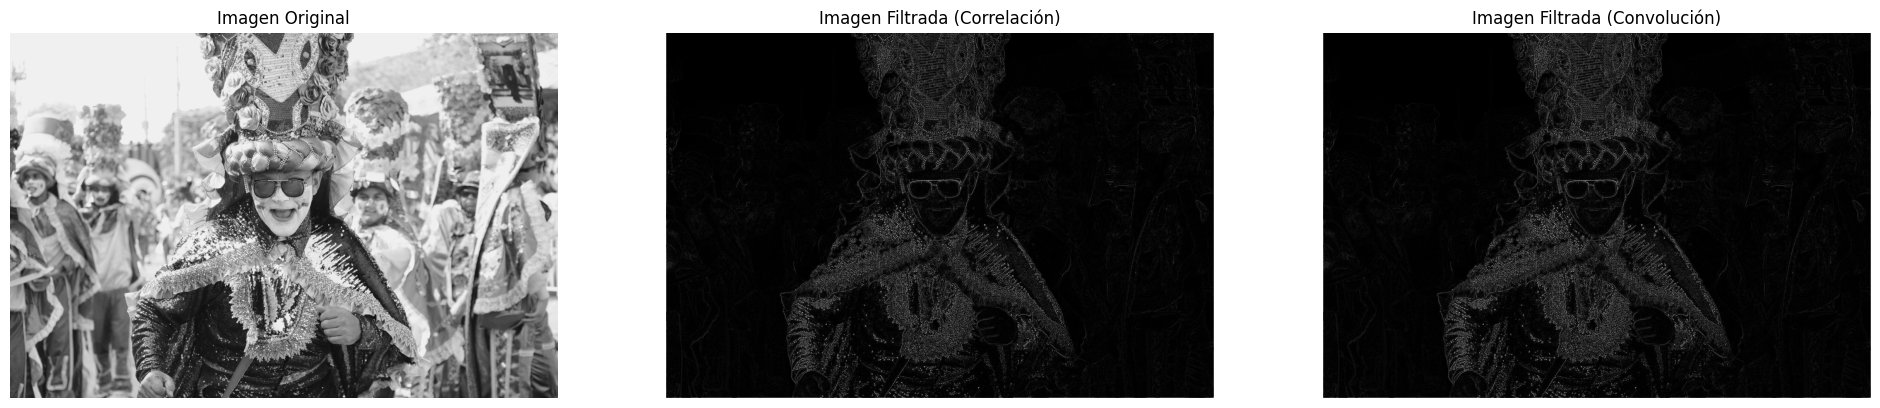

In [5]:
# Mostrar imagenes
plt.figure(figsize=(24, 12))

plt.subplot(1, 3, 1)
plt.imshow(imagen_original, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_correlacion, cmap='gray')
plt.title('Imagen Filtrada (Correlación)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagen_convolucion, cmap='gray')
plt.title('Imagen Filtrada (Convolución)')
plt.axis('off')

plt.show()

## 2 . Filtro no lineal con gaussiana

In [6]:
def aplicar_filtro_no_lineal_gaussiano(image, mask_size, sigma):
    """
    Aplica un filtro Gaussiano no lineal a una imagen.

    Parámetros:
    - image: Imagen de entrada (en escala de grises).
    - mask_size: Tamaño del lado de la máscara (debe ser un número impar).
    - sigma: Entero que controla la amplitud de la función gaussiana.

    Retorna:
    - Imagen filtrada.
    """
    filtered_image = cv2.GaussianBlur(image, (mask_size, mask_size), sigmaX=sigma, sigmaY=sigma)

    return filtered_image

In [7]:
# Descargar imagen , se necesita una imagen donde podamos notar el suavizado
!wget "https://pbs.twimg.com/profile_images/1478455929800695812/gVC46W6b_400x400.jpg" -O USA.jpg

--2024-04-05 13:35:18--  https://pbs.twimg.com/profile_images/1478455929800695812/gVC46W6b_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 151.101.40.159, 2606:2800:248:1707:10d3:19d0:1ba2:1a23
Connecting to pbs.twimg.com (pbs.twimg.com)|151.101.40.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26224 (26K) [image/jpeg]
Saving to: ‘USA.jpg’

USA.jpg             100%[===================>]  25.61K  --.-KB/s    in 0.03s   

2024-04-05 13:35:18 (813 KB/s) - ‘USA.jpg’ saved [26224/26224]



In [8]:
imagen_path_2 = '/content/USA.jpg'
imagen_original_2 = cv2.imread(imagen_path_2, cv2.IMREAD_GRAYSCALE)

In [9]:
# Aplicar el filtro no lineal con Gaussiana usando OpenCV
filtered_image = aplicar_filtro_no_lineal_gaussiano(imagen_original_2, mask_size=5, sigma=1.5)

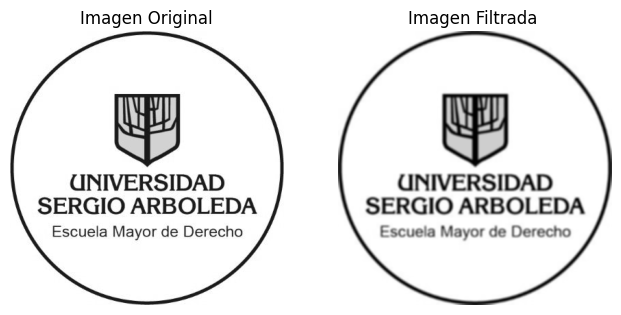

In [10]:
# Mostrar imagenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_original_2, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen Filtrada ')
plt.axis('off')


plt.show()

## 3.Funcion no lineal filtro interquantile mean

In [11]:
def interquartile_mean_filter(image, window_size=3):
    """
    Aplica el filtro de media intercuartílica a una imagen.

    Parámetros:
    - image: Imagen de entrada (en escala de grises).
    - window_size: Tamaño de la ventana de análisis. Debe ser un número impar.

    Retorna:
    - Imagen filtrada.
    """

    def interquartile_mean(data):
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        interquartile_range = (data >= Q1) & (data <= Q3)
        return np.mean(data[interquartile_range])

    return generic_filter(image, interquartile_mean, size=window_size)


In [12]:
# Descargar imagen , se necesita una imagen donde podamos notar el suavizado
!wget "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEifvHfBWWFpP95KUG0Ng2MWCnD4C2-UfbKlGjfpYAompNawp8arU2lYrecF0mD4PEaV4rLbt1ckqjm7jB18iC9aGHtmZdfzLy04jtMj3zcAGbR55LiKaBQOcHHLgultLB_Fv0wDJlFiSpI/s1600/salt-perry2.png" -O oso.png

--2024-04-05 13:35:19--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEifvHfBWWFpP95KUG0Ng2MWCnD4C2-UfbKlGjfpYAompNawp8arU2lYrecF0mD4PEaV4rLbt1ckqjm7jB18iC9aGHtmZdfzLy04jtMj3zcAGbR55LiKaBQOcHHLgultLB_Fv0wDJlFiSpI/s1600/salt-perry2.png
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306954 (300K) [image/png]
Saving to: ‘oso.png’

oso.png             100%[===================>] 299.76K  --.-KB/s    in 0.003s  

2024-04-05 13:35:21 (86.6 MB/s) - ‘oso.png’ saved [306954/306954]



In [13]:
imagen_path_3 = '/content/oso.png'
imagen_original_3 = cv2.imread(imagen_path_3, cv2.IMREAD_GRAYSCALE)

In [14]:
filtered_image = interquartile_mean_filter(imagen_original_3)

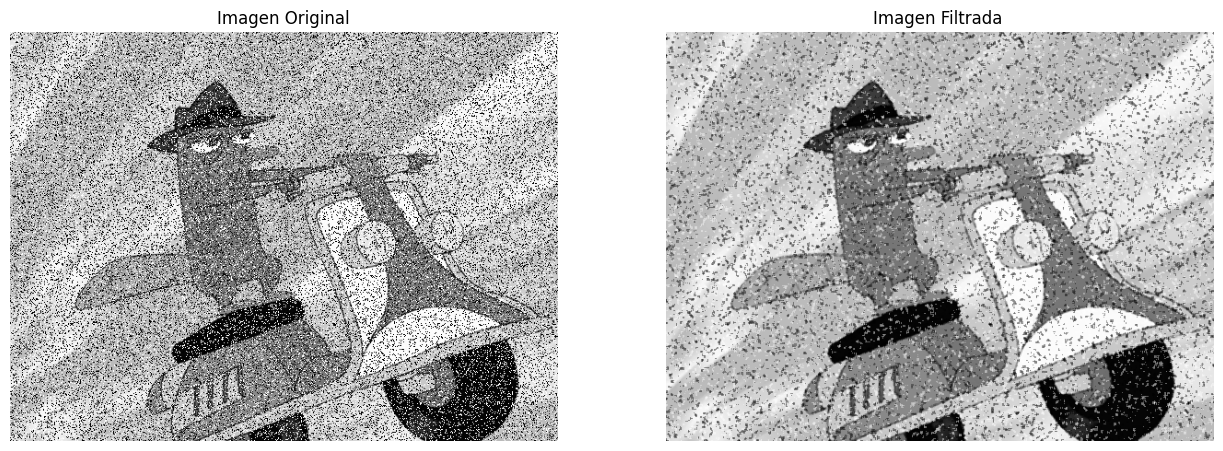

In [15]:
# Mostrar imagenes
plt.figure(figsize=(24, 12))

plt.subplot(1, 3, 1)
plt.imshow(imagen_original_3, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen Filtrada ')
plt.axis('off')


plt.show()

## 4.5. Proponer filtro de https://setosa.io/ev/image-kernels/

In [16]:
def aplicar_filtro_sharpen(imagen):
    # Definir el kernel para el filtro de agudización
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])

    # Aplicar el filtro de agudización
    imagen_filtrada = cv2.filter2D(imagen, -1, kernel)

    return imagen_filtrada

In [17]:
# Descargar imagen , se necesita una imagen donde podamos notar el suavizado
!wget "https://farm4.staticflickr.com/3447/3242769364_979a2678cc.jpg" -O sharpen.jpg

--2024-04-05 13:36:32--  https://farm4.staticflickr.com/3447/3242769364_979a2678cc.jpg
Resolving farm4.staticflickr.com (farm4.staticflickr.com)... 13.35.29.77, 2600:9000:213e:8400:0:5a51:64c9:c681, 2600:9000:213e:4200:0:5a51:64c9:c681, ...
Connecting to farm4.staticflickr.com (farm4.staticflickr.com)|13.35.29.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘sharpen.jpg’

sharpen.jpg             [ <=>                ] 112.15K  --.-KB/s    in 0.009s  

2024-04-05 13:36:32 (12.8 MB/s) - ‘sharpen.jpg’ saved [114844]



In [18]:
imagen_path_4 = '/content/sharpen.jpg'
imagen_original_4 = cv2.imread(imagen_path_4, cv2.IMREAD_GRAYSCALE)

In [19]:
# Aplicar filtro a todas las imagenes
imagen_sharpened = aplicar_filtro_sharpen(imagen_original)
imagen_sharpened_2 = aplicar_filtro_sharpen(imagen_original_2)
imagen_sharpened_3 = aplicar_filtro_sharpen(imagen_original_3)
imagen_sharpened_4 = aplicar_filtro_sharpen(imagen_original_4)

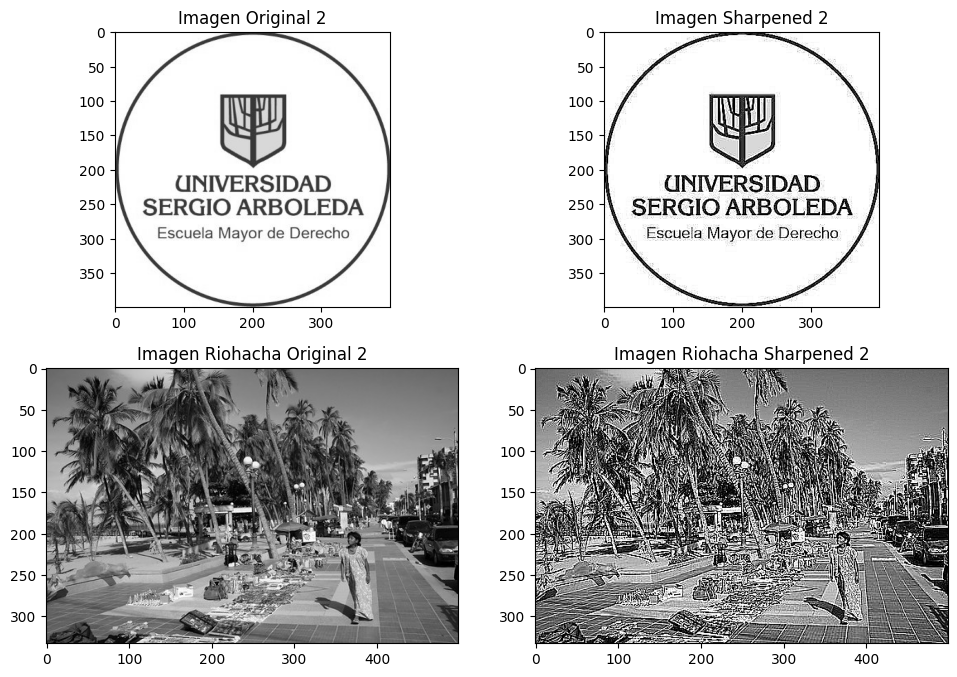

In [20]:
# Mostrar las imágenes originales y las imágenes filtradas
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(imagen_original_2, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original 2')

plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(imagen_sharpened_2, cv2.COLOR_BGR2RGB))
plt.title('Imagen Sharpened 2')

plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(imagen_original_4, cv2.COLOR_BGR2RGB))
plt.title('Imagen Riohacha Original 2')

plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(imagen_sharpened_4, cv2.COLOR_BGR2RGB))
plt.title('Imagen Riohacha Sharpened 2')

plt.tight_layout()
plt.show()